# **Cybersecurity Attacks Exploratory Data Analysis (EDA)**


**Import Library:**

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import numpy as np
import math
import copy
from datetime import datetime, timedelta
import calendar
from datetime import date
from scipy import stats
from sqlalchemy import inspect



import ipaddress
from scipy.stats import chi2_contingency
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

**Import Database :**

In [69]:
engine = create_engine("sqlite:///CyberAttacks.db")

In [70]:
inspector = inspect(engine)
all_tables = inspector.get_table_names()
all_tables

['Cybersecurity_attacks', 'TCP-ports']

**Explore the Database:**

In [71]:
df=pd.read_sql('select * FROM Cybersecurity_attacks;', engine)


In [72]:
df.head(4)

,Attackcategory,Attacksubcategory,Protocol,SourceIP,SourcePort,DestinationIP,DestinationPort,AttackName,AttackReference,.,Time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417


# **Cleanning Part :**

In [73]:
df_before_cleeaning=df.copy() # copy the datafream before cleanning

In [74]:
df.shape

(178031, 11)

In [75]:
df[['Start time','End time']] = df['Time'].str.split('-',expand=True) #split the time into start and end time
df.head()

,Attackcategory,Attacksubcategory,Protocol,SourceIP,SourcePort,DestinationIP,DestinationPort,AttackName,AttackReference,.,Time,Start time,End time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418,1421927418,1421927418


In [76]:
df['.'].unique()# there is no benfit for this columns

array(['.'], dtype=object)

In [77]:
df = df.drop(['.', 'Time'],axis=1)# Drop the two "." and 'time'
df.head()

,Attackcategory,Attacksubcategory,Protocol,SourceIP,SourcePort,DestinationIP,DestinationPort,AttackName,AttackReference,Start time,End time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418


In [78]:
df.isnull().sum() # check from null value

,0
Attackcategory,0
Attacksubcategory,4476
Protocol,0
SourceIP,0
SourcePort,0
DestinationIP,0
DestinationPort,0
AttackName,0
AttackReference,51745
Start time,0


In [79]:
df["Attacksubcategory"] = df["Attacksubcategory"].fillna("Not Registered") # since the subcategory not definde let it as Not Registered

In [80]:
df.isnull().sum()

,0
Attackcategory,0
Attacksubcategory,0
Protocol,0
SourceIP,0
SourcePort,0
DestinationIP,0
DestinationPort,0
AttackName,0
AttackReference,51745
Start time,0


In [81]:
print(df[pd.isnull(df['AttackReference'])]['Attackcategory'].value_counts()) #to know which attack category have the most null in attacks refreance

Attackcategory
Fuzzers           30297
Reconnaissance    18538
Analysis           1657
Shellcode           761
Generic             351
Backdoor             68
DoS                  56
Worms                12
Exploits              5
Name: count, dtype: int64


In [82]:
# Percentage of missing values in 'Attack Reference' per Attack Category
((df[pd.isnull(df['AttackReference'])]['Attackcategory'].value_counts()/df['Attackcategory'].value_counts())*100).dropna().sort_values(ascending=False)

,count
Attackcategory,
Reconnaissance,90.117155
Fuzzers,88.172638
Analysis,85.721676
Shellcode,49.383517
Worms,6.936416
Generic,1.729405
Backdoor,1.622137
DoS,0.222957
Exploits,0.007185


In [83]:
df.head()

,Attackcategory,Attacksubcategory,Protocol,SourceIP,SourcePort,DestinationIP,DestinationPort,AttackName,AttackReference,Start time,End time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418


In [84]:
df[df.duplicated()].shape  # check from duplicated

(6, 11)

In [85]:
print('The Dimensions before dropping duplicated rows: ' + str(df.shape))
df = df.drop(df[df.duplicated()].index)
print('The Dimensions after dropping duplicated rows: ' + str(df.shape))

The Dimensions before dropping duplicated rows: (178031, 11)
The Dimensions after dropping duplicated rows: (178025, 11)


In [86]:
invalid_SourcePort = (df['SourcePort'] < 0) | (df['SourcePort'] > 65535)
invalid_DestinationPort = (df['DestinationPort'] < 0) | (df['DestinationPort'] > 65535)
df[invalid_SourcePort | invalid_DestinationPort].head()

,Attackcategory,Attacksubcategory,Protocol,SourceIP,SourcePort,DestinationIP,DestinationPort,AttackName,AttackReference,Start time,End time
174347,Generic,IXIA,udp,175.45.176.1,67520,149.171.126.18,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2005-4092 (http://cve.mitre.org/cgi-bin/cv...,1421933561,1421933561
174348,Exploits,Browser,tcp,175.45.176.3,78573,149.171.126.18,110,Microsoft Internet Explorer 6.0 Png pngfilt.dl...,BPS 2010-0002 (https://strikecenter.bpointsys....,1421932490,1421932491
174349,Reconnaissance,HTTP,tcp,175.45.176.1,71804,149.171.126.10,80,Domino Web Server Database Access: /internet.n...,None,1424236143,1424236143
174350,DoS,Ethernet,pnni,175.45.176.3,0,149.171.126.19,-753,Cisco IPS Jumbo Frame System Crash (https://st...,CVE 2008-2060 (http://cve.mitre.org/cgi-bin/cv...,1424230284,1424230284
174351,Fuzzers,OSPF,trunk-1,175.45.176.0,73338,149.171.126.13,0,Fuzzer: OSPF Hello Packet: Long Neighbor Lists...,None,1424223172,1424223172


In [87]:
df = df[~(invalid_SourcePort | invalid_DestinationPort)].reset_index(drop=True)


In [88]:
df.shape

(174341, 11)

In [89]:
print("Attack category:",df['Attackcategory'].unique()) # there is duplicated such as tcp and TCP
print('Protocol:',df['Protocol'].unique()[:15]) # Backdoor vs Backdoors

Attack category: ['Reconnaissance' 'Exploits' 'DoS' 'Generic' 'Shellcode' 'Fuzzers' 'Worms'
 'Backdoors' 'Analysis' 'Backdoor']
Protocol: ['tcp' 'udp' 'Tcp' 'UDP' 'ospf' 'sctp' 'sep' 'mobile' 'sun-nd' 'swipe'
 'pim' 'ggp' 'ip' 'ipnip' 'st2']


In [90]:
df['Protocol'] = df['Protocol'].str.upper().str.strip()
df['Attackcategory'] = df['Attackcategory'].str.upper().str.strip()
df['Attackcategory'] = df['Attackcategory'].str.strip().replace('BACKDOORS','BACKDOOR')

df.head()

,Attackcategory,Attacksubcategory,Protocol,SourceIP,SourcePort,DestinationIP,DestinationPort,AttackName,AttackReference,Start time,End time
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418


In [91]:
df['Start time'] = pd.to_datetime(df['Start time'], unit='s')
df['End time'] = pd.to_datetime(df['End time'], unit='s')
df['Duration'] = ((df['End time'] - df['Start time']).dt.seconds).astype(int)
df['hour'] = df.apply(lambda row: '0'*(2-len(str(row['Start time'].hour)))+str(row['Start time'].hour)+':00:00', axis=1)
df['Month'] = df['End time'].dt.month
df['Day'] = df['End time'].dt.day

df

,Attackcategory,Attacksubcategory,Protocol,SourceIP,SourcePort,DestinationIP,DestinationPort,AttackName,AttackReference,Start time,End time,Duration,hour,Month,Day
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,2015-01-22 11:50:14,2015-01-22 11:50:16,2,11:00:00,1,22
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:15,2015-01-22 11:50:15,0,11:00:00,1,22
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:16,2015-01-22 11:50:16,0,11:00:00,1,22
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:17,2015-01-22 11:50:17,0,11:00:00,1,22
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:18,2015-01-22 11:50:18,0,11:00:00,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174336,DOS,IGMP,TCP,175.45.176.0,33654,149.171.126.12,80,Microsoft IIS Repeated Parameter Request Denia...,CVE 2010-1899 (http://cve.mitre.org/cgi-bin/cv...,2015-02-18 12:21:06,2015-02-18 12:21:09,3,12:00:00,2,18
174337,FUZZERS,SMB,TCP,175.45.176.3,36468,149.171.126.15,445,Fuzzer: SMB Session Setup Invalid Username (NT...,None,2015-02-18 12:21:07,2015-02-18 12:21:08,1,12:00:00,2,18
174338,RECONNAISSANCE,SunRPC Portmapper (TCP) UDP Service,TCP,175.45.176.2,64395,149.171.126.18,111,SunRPC TCP Portmapper GETPORT Request (ippathv...,None,2015-02-18 12:21:07,2015-02-18 12:21:08,1,12:00:00,2,18
174339,GENERIC,IXIA,UDP,175.45.176.0,47439,149.171.126.10,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,2015-02-18 12:21:08,2015-02-18 12:21:08,0,12:00:00,2,18


# **Exploratory Data Analysis (EDA)**

In [92]:
df_AfterCleanning=df.copy() # creat a new copy before EDA

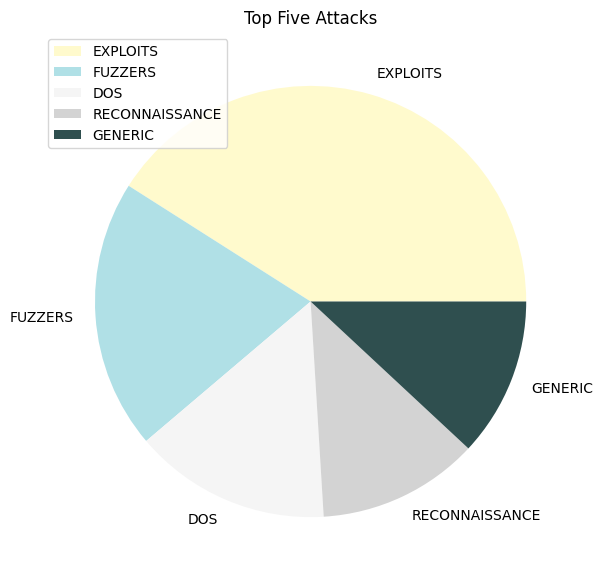

In [93]:
x=pd.DataFrame(df['Attackcategory'].value_counts())[:5]
colors = ['lemonchiffon', 'powderblue','whitesmoke','lightgray','darkslategray','darkseagreen']

x.plot(kind='pie', subplots=True, figsize=(7, 7) ,colors=colors)
plt.title('Top Five Attacks')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()
#plt.savefig('pie.png',dpi=250)

Text(0.5, 1.0, 'Number of attacks per Attack caterogy')

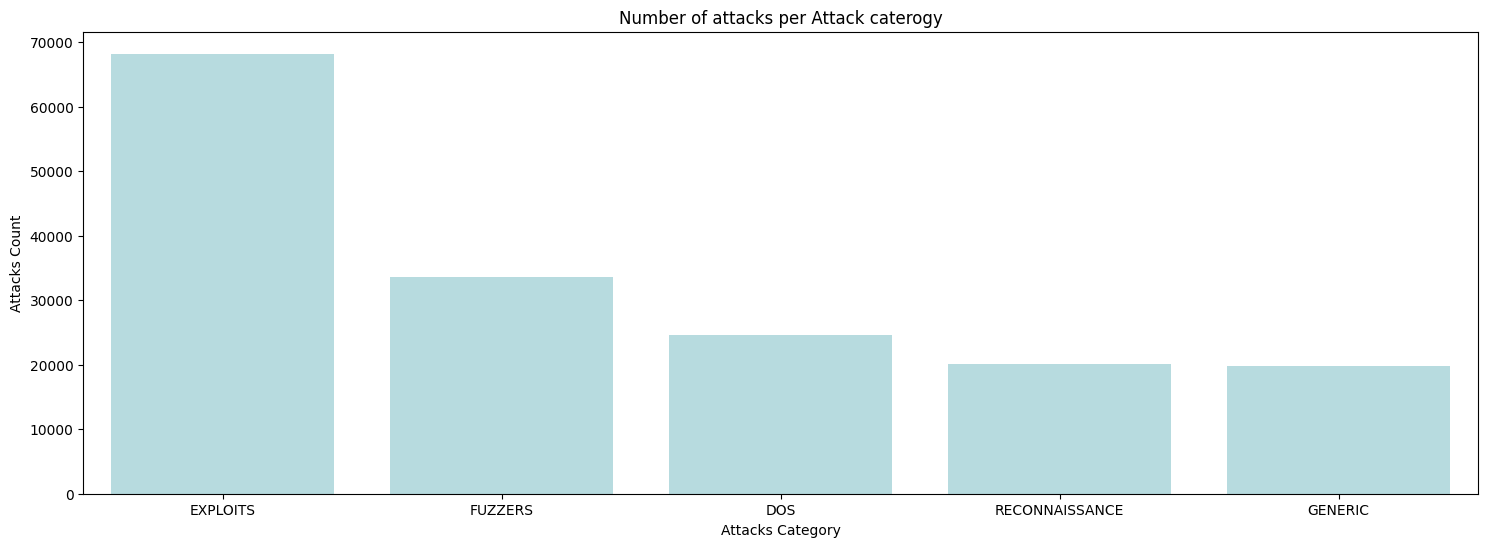

In [94]:
plt.figure(figsize=(18,6))
sns.barplot(x=(df['Attackcategory'].value_counts().index)[:5],y=(df['Attackcategory'].value_counts())[:5],color='powderblue')
plt.xlabel('Attacks Category')
plt.ylabel('Attacks Count')
plt.title('Number of attacks per Attack caterogy')


In [95]:
numeric_df = DfDummies.select_dtypes(include=['number', 'bool'])
numeric_df = numeric_df.astype(int)
corr_matrix = numeric_df.corr()

#DfDummies = pd.get_dummies(df, columns=['Attackcategory'], drop_first=True)
#DfDummies.dtypes

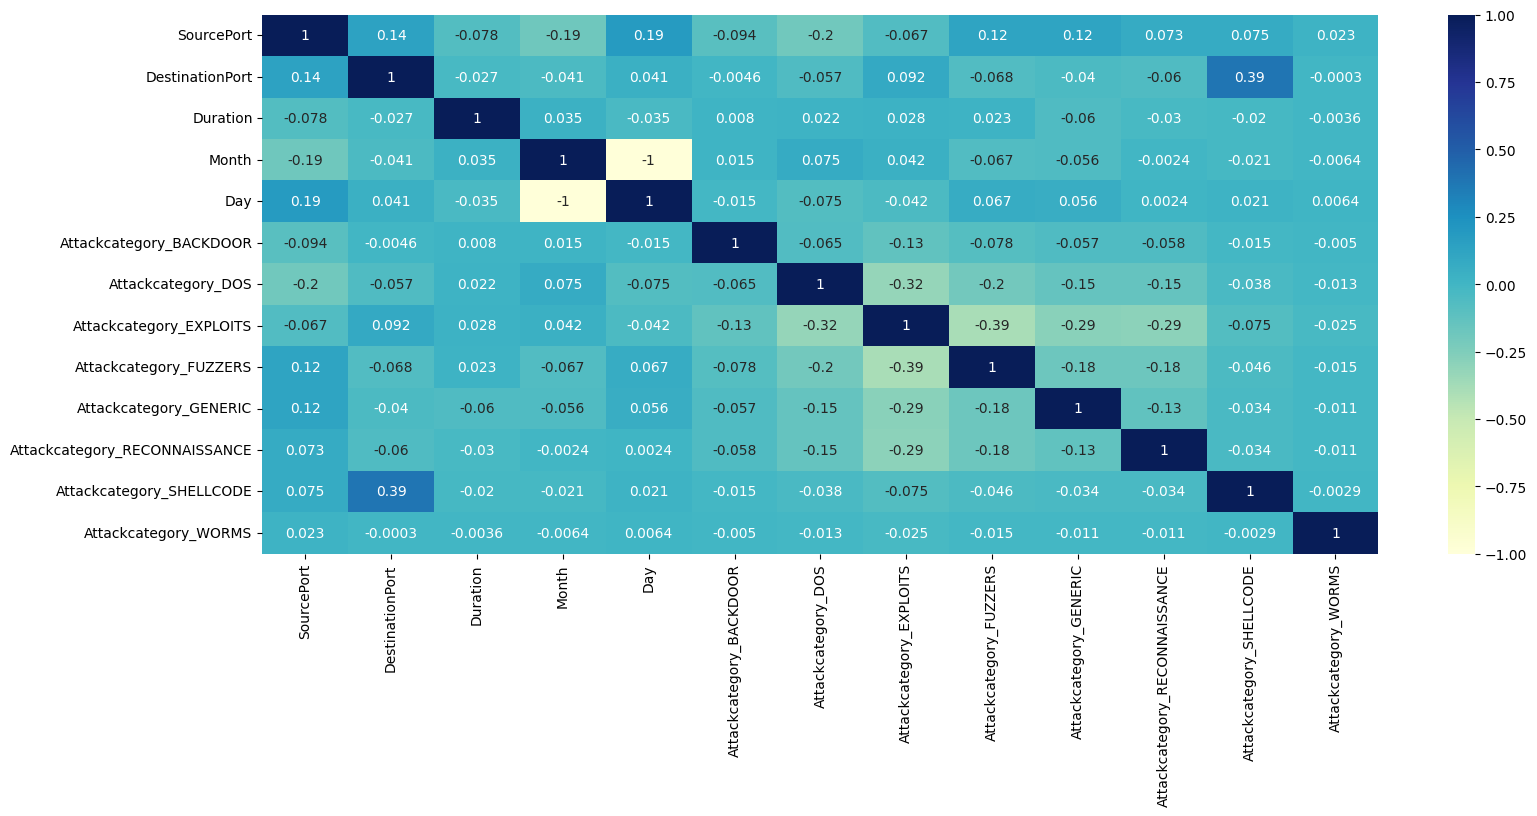

In [96]:
plt.figure(figsize=(18,7))
sns.heatmap(corr_matrix, annot=True ,cmap="YlGnBu")
plt.show()

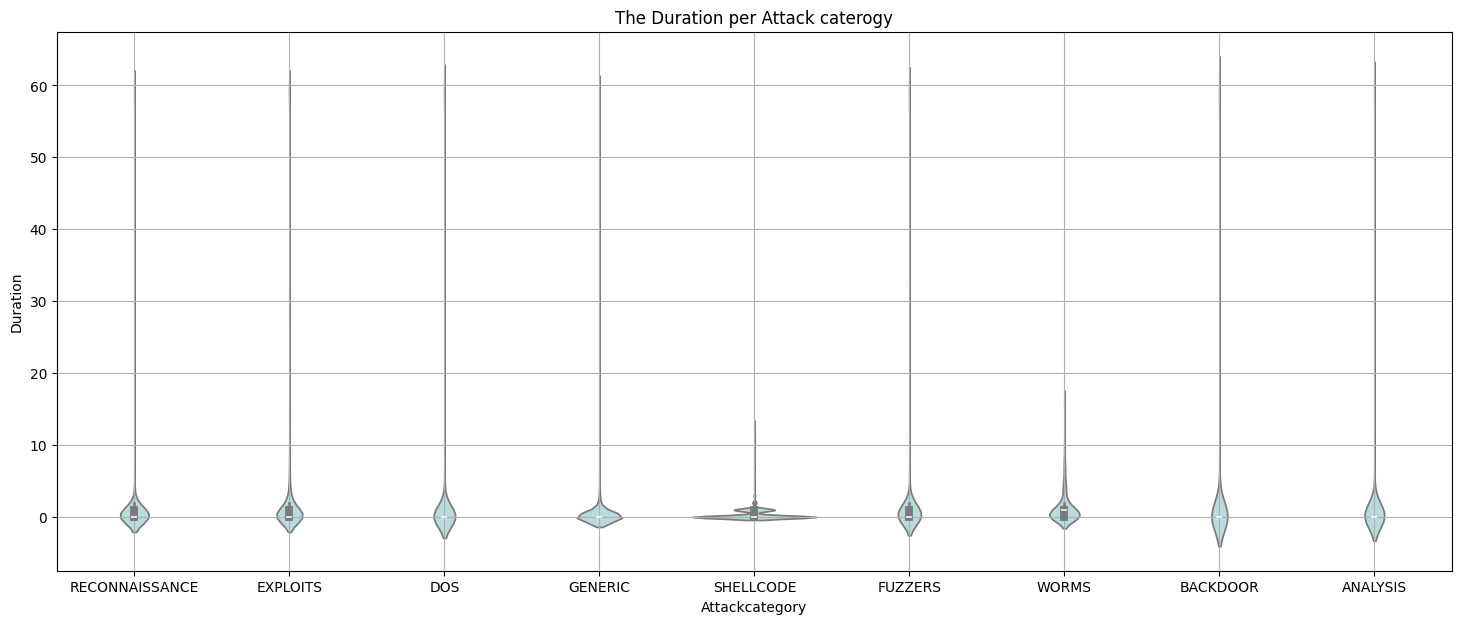

In [97]:
plt.figure(figsize=(18,7))
sns.violinplot(x='Attackcategory', y='Duration', data=df,color='powderblue')
plt.title('The Duration per Attack caterogy')
plt.grid(True)
plt.show()

In [98]:
df_pivot = df.copy()
df_pivot1 = pd.pivot_table(df_pivot,values='AttackName', index=['hour'], columns=['Attackcategory'], aggfunc='count')

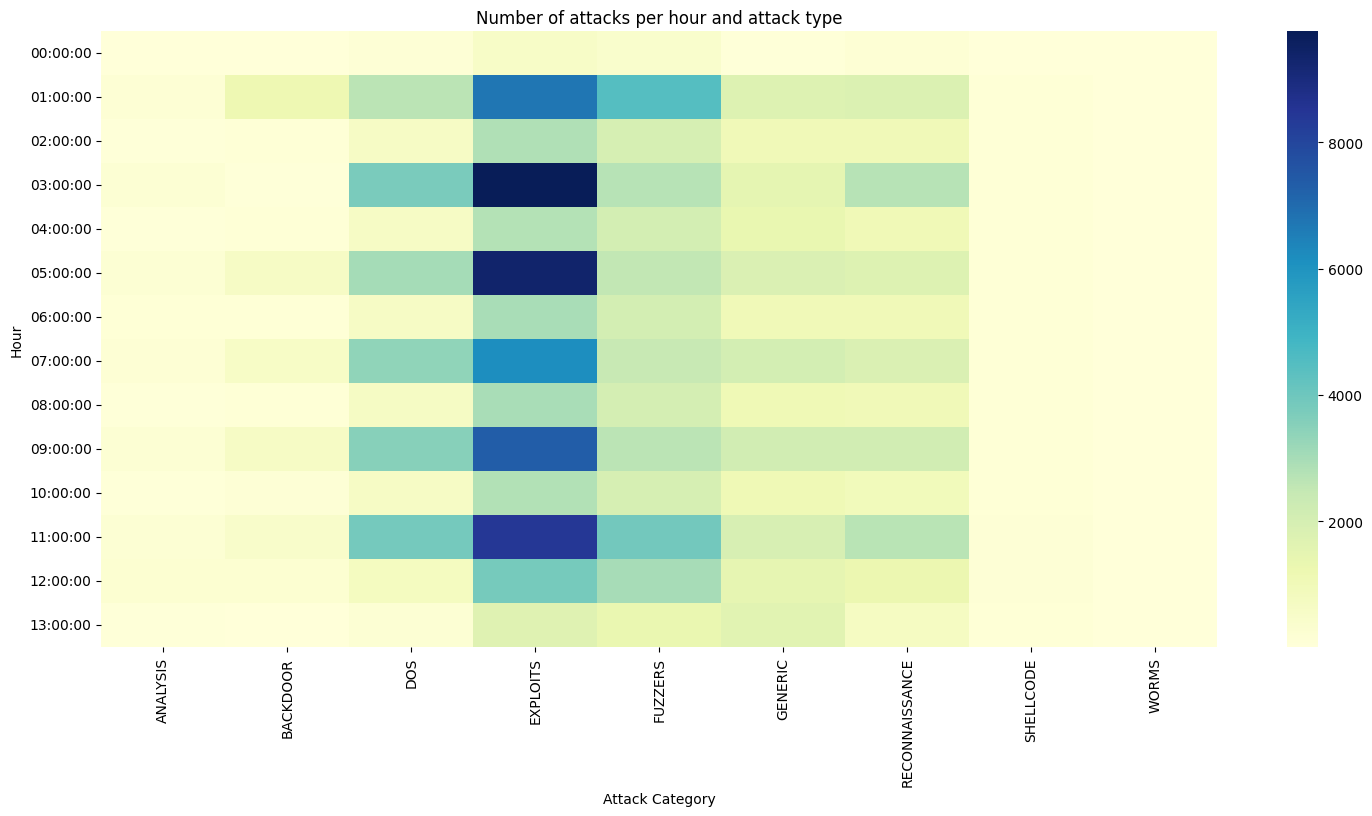

In [99]:
plt.figure(figsize=(18,8))
ax = sns.heatmap(df_pivot1,cmap="YlGnBu")
sns.color_palette("mako")
plt.xlabel('Attack Category')
plt.ylabel('Hour')
plt.title('Number of attacks per hour and attack type')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

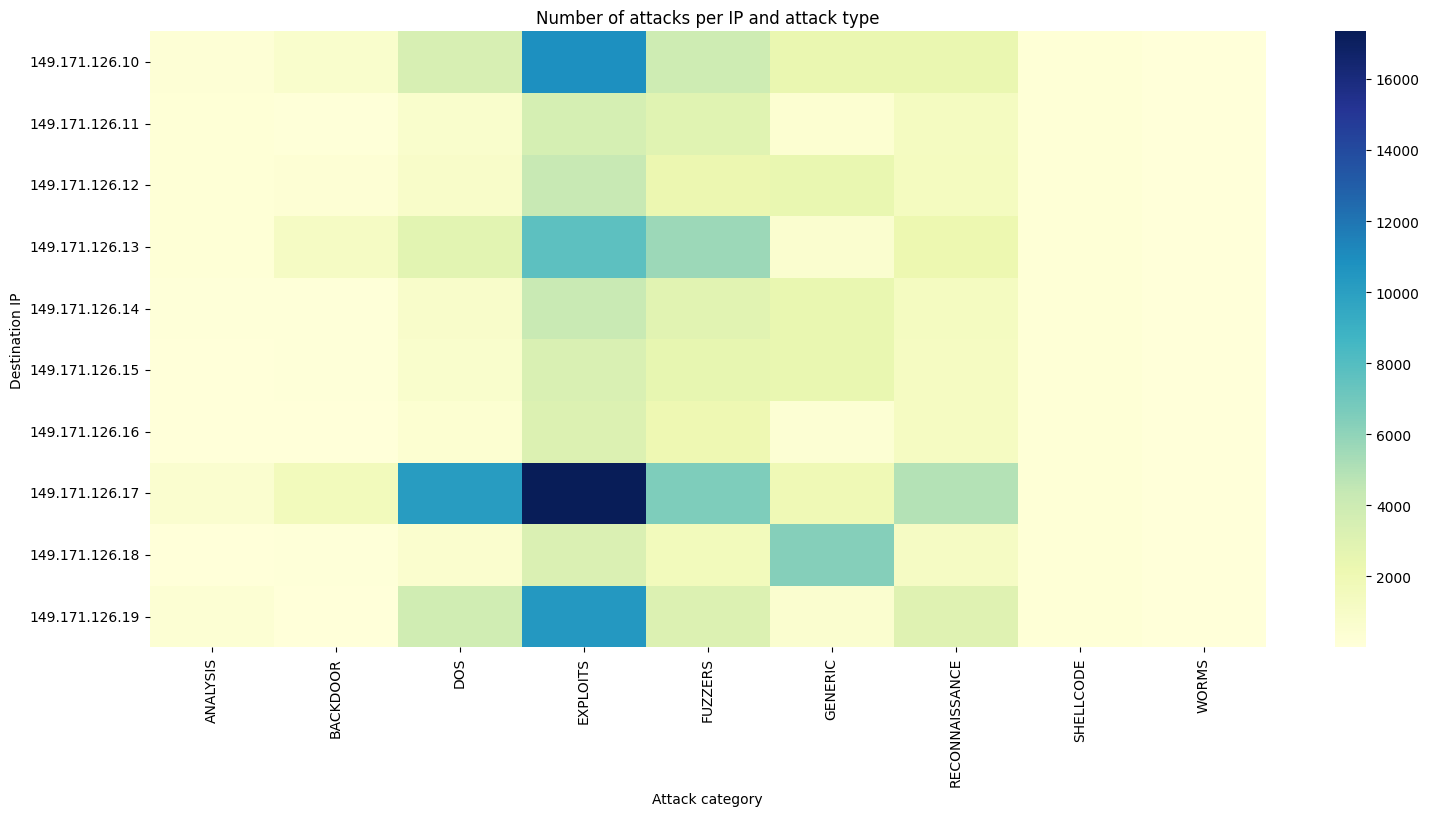

In [100]:
df_pivot2 = pd.pivot_table(df_pivot, values='AttackName', index=['DestinationIP'], columns=['Attackcategory'], aggfunc='count')
plt.figure(figsize=(18,8))
ax = sns.heatmap(df_pivot2,cmap="YlGnBu")
plt.xlabel('Attack category')
plt.ylabel('Destination IP')
plt.title('Number of attacks per IP and attack type')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [101]:
processed_csv_path = "cleaned_data.csv"  # Save cleaned data to CSV
df.to_csv(processed_csv_path, index=False)